<a href="https://colab.research.google.com/github/PatrickBassan/AnaliseExploratoriaDeDados/blob/main/AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise  Exploratória  de  Dados
#### Aluno: Patrick de Freitas Bassan

### Dataset utilizado
https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

### Materiais e métodos

Nesse trabalho tenho o objetivo de prever as cobranças dos clientes para uma empresa de seguros, para que a mesma possa decidir quanto cobrar das pessoas corretamente.

O  universo  de  estudo  é  composto  pelos dados dos clientes que serão as seguintes features:

* Age: Idade do beneficiário principal;
* Sex: Gênero do contratante do seguro (feminino/masculino);
* BMI: Índice de massa corporal;
* Childred: Número de crianças cobertas pelo seguro de saúde / Número de dependentes;
* Smoker: Fumante (Sim/Não);
* Region: área de residência do beneficiário nos EUA, nordeste, sudeste, sudoeste e noroeste;
* Charge: custos médicos individuais faturados pelo seguro de saúde.



# Análise descritiva dos dados
Primeiramente é necessário entender os dados que obtivemos, para isso importei o dataset e imprimi os primeiros valores dele.

In [19]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importando dataset
df = pd.read_csv('insurance.csv')

# visualizando os primeiros dados
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# obtendo algunas informações a respeito do datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Como podemos ver acima, o  conjunto  de  dados  analisados  consiste  de  informações  de com 7 variáveis e 1338 observações. Felizmente, parece que não há valores faltantes no quadro de dados.

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Como podemos ver na tabela acima, nota-se que a idade mínima é 18 e a idade máxima é 64. Também podemos ver que os valores médio (mean) e mediano (50%) da idade são quase os mesmos.

Também notei que o valor máximo de cobrança é de63.770, um valor incomum.

Abaixo, vemos o valor mais frequente para o sexo é masculino, que aparece no conjunto de dados 676 vezes.

Existem 4 regiões exclusivas em nosso conjunto de dados e o valor mais frequente é o sudeste e com 364 resultados.

Finalmente, vemos que a maioria das pessoas não fuma, com 1064 observações.

In [14]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Limpeza dos dados

Com o objetivo de deixar os dados pronto para visualização e análise profunda, devemos nos livrar de valores duplicados e faltantes.

Como podemos ver abaixo, não existem dados faltantes, mas existe um dado duplicado que será removido.

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [17]:
df.drop_duplicates(keep='first',inplace=True)

# Visualizando os dados
Iremos analisar algumas das nossas variáveis.

Abaixo nós vemos que nossos dados parecem estar deslocados à direita (positivamente). A maioria das cobranças está entre 0-10000 dólares.

<ipython-input-29-b84165184119>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.charges,color='r')


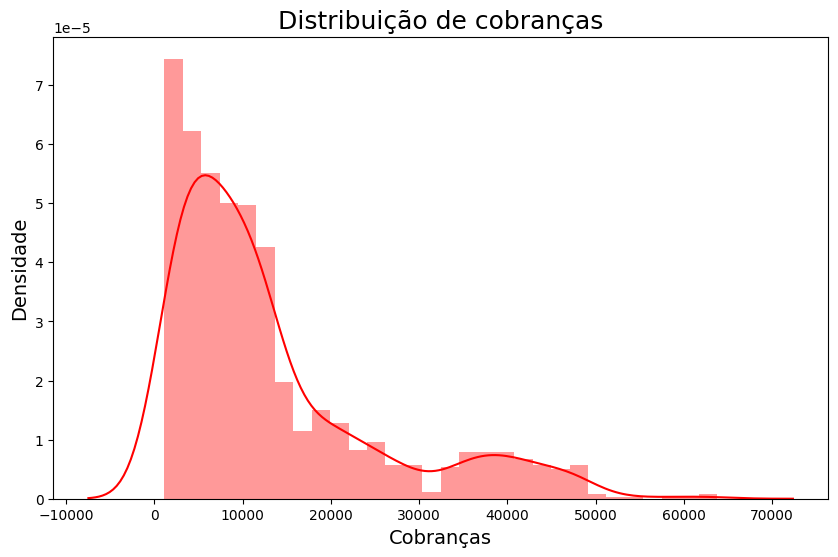

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='r')
plt.title('Distribuição de cobranças',size=18)
plt.xlabel('Cobranças',size=14)
plt.ylabel('Densidade',size=14)
plt.show()

Abaixo vemos que a maioria dos clientes tem 18-19 anos. A distribuição parece uma distribuição uniforme.

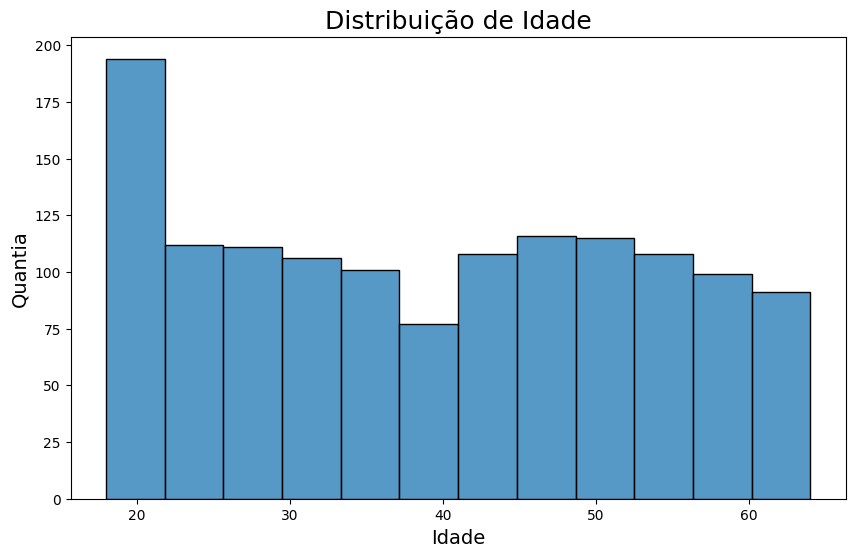

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Distribuição de Idade',size=18)
plt.xlabel('Idade',size=14)
plt.ylabel('Quantia',size=14)
plt.show()

Abaixo vemos que a maioria das pessoas tem um IMC entre 27-38 kg/m²

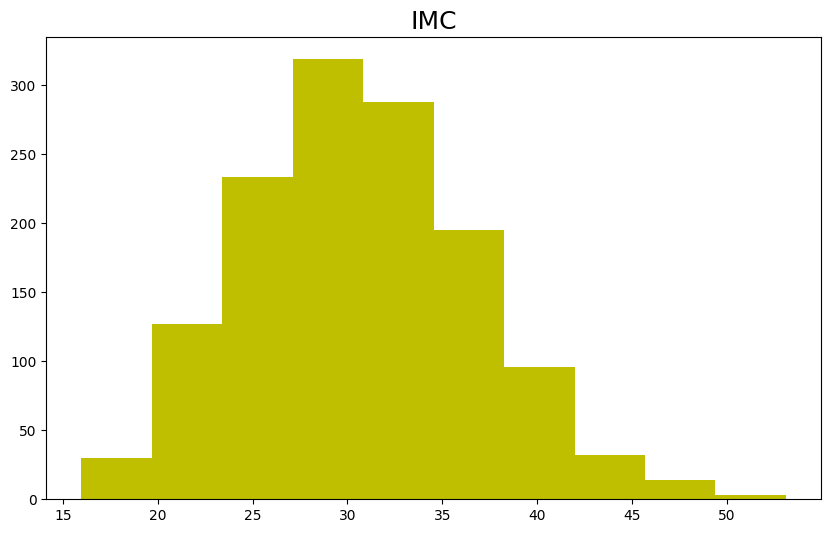

In [27]:
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('IMC',size=18)
plt.show()

Abaixo vemos que os clientes do sexo feminino e masculino têm quase o mesma quantia.

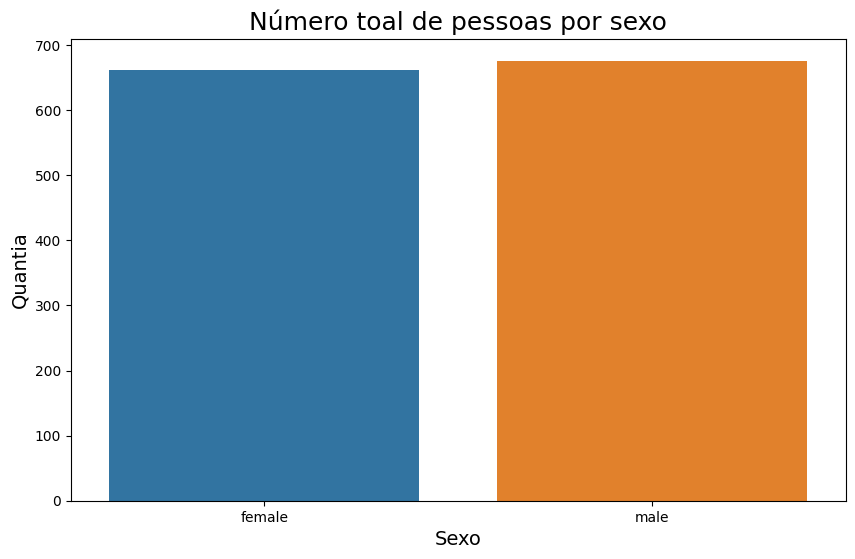

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Número total de pessoas por sexo',size=18)
plt.ylabel('Quantia',size=14)
plt.xlabel('Sexo',size=14)
plt.show()

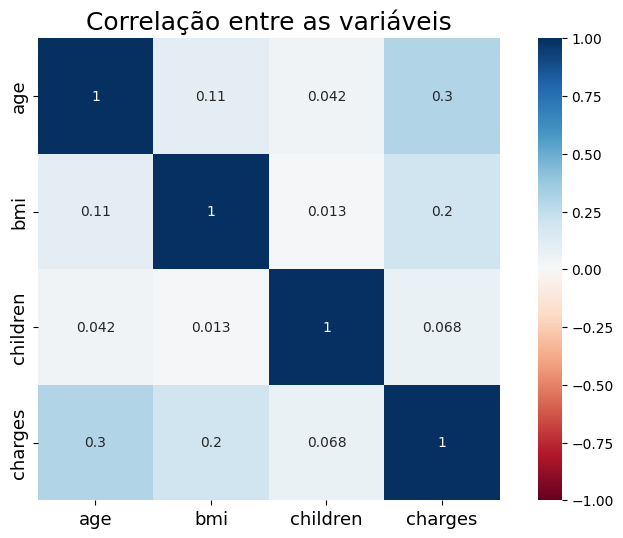

In [44]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlação entre as variáveis',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

# Conclusão

 Juntando os resultados que obtemos com essa análise, percebemos que a maioria dos clientes não possui filhos e podemos deferir que isso está relacionado com o fato da maior dos clientes estar entre seus 18 e 19 anos de idade.<br>

  O grupo de clientes possui uma quantidade de mulheres e homens bem nivelada e maioria deles tem um IMC entre 27-38, o que é considerado como excesso de peso.<br>
  
  Olhando o gráfico de correlação entre as variáveis, percebemos também que há uma correlação entre idade e cobranças. À medida que a idade aumenta, os custos do seguro também aumentam ou vice-versa. Vemos que há uma correlação fraca entre o IMC e as cobranças.